# Assignment 1: Introduction to Data Science and Python


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

## Contributors:
### Lukas Andersson - X Hours
###

## 1.

### a.
In this first assignment we manipulate given data to later print it out as a scatter plot. By looking at the data you quickly realize that the life expectancy data have way more entires than the given GDP data. This has two reasons, firstly because every country has data from several years, not just 2015, in the life expectancy table. And secondly because they do not have the same set of countries to begin with. To solve this we first remove every single entry that does not have data from the year of 2015, since thats the only data we have on GDP. Then we loop through all those entries and make sure to only keep the ones where the country exists in both data sets. When we filterd out all data we do not want, we simply plot out the results. The first graph includes all data and the second one excludes the entry far right.  

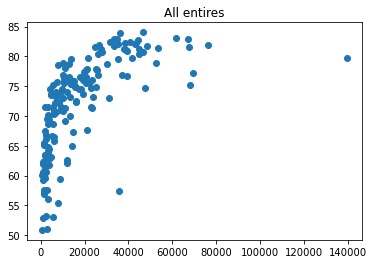

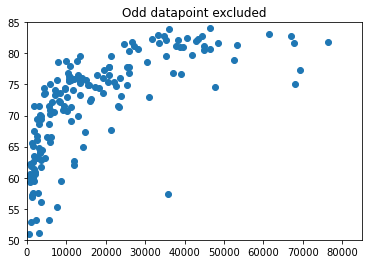

In [2]:
x = []
y = []

df1 = pd.read_csv('../data/GDP-2015.csv')
df2 = pd.read_csv('../data/life-expectancy.csv')

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row2['Entity'] == row1['Entity']:
                x.append(row1['GDP per capita'])
                y.append(row2['Life expectancy (years)'])
                
data = np.column_stack((x, y))

plt.scatter(x, y)
plt.title('All entires')
plt.show()

plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.show()

### b.
When looking at the result we clearly see that when the GDP per capita goes up, (X axis), the life expectancy generally also goes up. There are some countries with high life expectancy even tho the GDP is low, but not the other way around. There is in our data set only one country that has a low life expectancy while the GDP is relatively high. This one data point is the only thing contradicting the correlation between GDP and life expectancy so we would draw the conclusion that high GDP in fact does contribute to higher life expectancy. The second graph that excludes the entry far to the right simply is a zoomed in version to make the correaltion more visible.

This result seems very reasonable since higher life expectancy is what you would think will happen if you have a higher GDP per capita, very resonable.

### c.
No, nothing was removed from the data however we made two plots, where one datapoint is not included in the second one. The reason for this is becuase that datapoint is so extreme compared to the other data, so it is more visually pleasing not not include it and easier see the correlation.   
  
TODO: Modify after all questions are complete

### d.
Below is a list with all countries that have life expectancy higher than one standar deviation above the mean.

In [3]:
countries_LE_above_OneSD = []
one_sd_above_mean = (data.mean(axis=0)  + data.std(axis=0))[1]
for index, row in df2.iterrows():
    if row['Year'] == 2015:
        if(row['Life expectancy (years)'] >  one_sd_above_mean):
            countries_LE_above_OneSD.append(row['Entity'])
dfd = pd.DataFrame(countries_LE_above_OneSD)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfd)

                             0
0                      Andorra
1                     Anguilla
2                    Australia
3                      Austria
4                      Belgium
5                      Bermuda
6                       Canada
7               Cayman Islands
8              Channel Islands
9                       Cyprus
10                     Denmark
11              Faeroe Islands
12            Falkland Islands
13                     Finland
14                      France
15                     Germany
16                      Greece
17                  Guadeloupe
18                   Hong Kong
19                     Iceland
20                     Ireland
21                 Isle of Man
22                      Israel
23                       Italy
24                       Japan
25               Liechtenstein
26                  Luxembourg
27                       Macao
28                       Malta
29                  Martinique
30                      Monaco
31      

### e.
Every country in the top left of the graph, theese countries are also printed in the list below the graph to name some exampels.

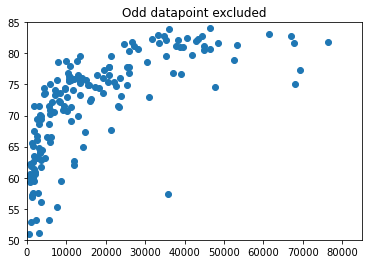

                         0
0                  Albania
1                  Algeria
2                  Armenia
3               Azerbaijan
4                 Barbados
5   Bosnia and Herzegovina
6                   Brazil
7                 Bulgaria
8               Cape Verde
9                    China
10                Colombia
11              Costa Rica
12                    Cuba
13                Dominica
14      Dominican Republic
15                 Ecuador
16             El Salvador
17                 Georgia
18               Guatemala
19                Honduras
20                    Iran
21                 Jamaica
22                  Jordan
23                 Lebanon
24                   Libya
25               Macedonia
26                  Mexico
27              Montenegro
28                 Morocco
29               Nicaragua
30               Palestine
31                Paraguay
32                    Peru
33             Saint Lucia
34                  Serbia
35               Sri Lanka
3

In [4]:
mean = data.mean(axis=0)
countries_lowGDP_highLE = []

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index1, row1 in df1.iterrows():
            if row2['Entity'] == row1['Entity']:
                if(row1['GDP per capita'] < mean[0]) and row2['Life expectancy (years)'] >  mean[1]:
                    countries_lowGDP_highLE.append(row1['Entity'])

plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.show()   
                    
dfd = pd.DataFrame(countries_lowGDP_highLE)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dfd)

### f.
There seems to be an upgoing trend for countries with high GDP, however, there are several countries with quite low life expectancy even though they have quite high GDP. The average life expectancy is 72 years in our data, if you look at the graph below you can see that even ones very far right (High GDP) are below average life expectancy. So it depends on what you classify as low life expectancy, if below average is considerd low there is for sure countries with high GDP and low life expectancy.

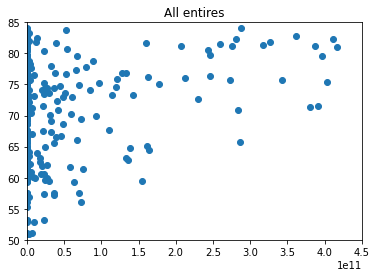

In [5]:
x1 = []
y1 = []

df3 = pd.read_csv('../data/national-gdp.csv')

for index2, row2 in df2.iterrows():
    if row2['Year'] == 2015:
        for index3, row3 in df3.iterrows():
            if row3['Year'] == 2015 and row3["Entity"] == row2["Entity"]:
                x.append(row3["Total output-side real GDP at chained PPPs (tot_rgdp_o) (PWT 9.1 (2019))"])
                y.append(row2['Life expectancy (years)'])
                
data = np.column_stack((x, y))

plt.scatter(x, y)
plt.title('All entires')
plt.xlim([0, 450000000000])
plt.ylim([50, 85])
plt.show()

### g.
If we would use GDP per capita instead we could use the graph we made earlier in question A. We can see on this graph that every single data point quickly gets above the average life expectancy (72 Years). There is only one exception to this which is Equatorial Guinea, that stands out a lot on the graph being extremely low life expectancy despite having quite high GDP per capita. This is however just one extreme data point and should not be the base of any conclusions, the vast majority of the data suggests that high GDP per capita actually seem to imply that the life expectancy is not low in that specific country.    

This means that GDP per capita seems to be a better indicator than just GDP if you want to see a correalation between GDP and life expectancy. This is quite reasonable too since the GDP of a country says nothing about what the majority of peoples living standards are. You need to relate the GDP to the population to get any info about how the living standards could be.

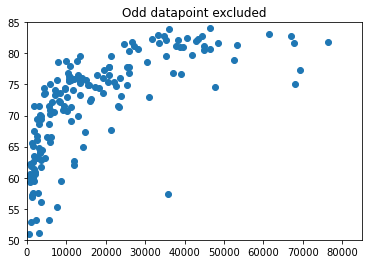

In [6]:
plt.scatter(x, y)
plt.title('Odd datapoint excluded')
plt.xlim([0, 85000])
plt.ylim([50, 85])
plt.show()

## 2.

### a.


### b.
